In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install kagglehub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.animation as animation

In [2]:
import kagglehub

path = kagglehub.dataset_download("anassarfraz13/student-success-factors-and-insights")
print(path)
data = pd.read_csv(path + "/studentPerformanceFactors.csv")

/Users/tonyguan/workshop1/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/tonyguan/.cache/kagglehub/datasets/anassarfraz13/student-success-factors-and-insights/versions/1


# 🐼 Introduction to Pandas

## What is Pandas?
**Pandas** is a Python library designed for **data analysis and manipulation**.  
It provides fast, flexible, and expressive data structures that make it easy to work with structured data.

Pandas is especially useful when working with:
- **CSV files** (spreadsheets or datasets)
- **DataFrames** (tables similar to Excel)
- **Series** (single columns of data)
- **Statistical analysis** and **data cleaning**

---

## 💡 Why Use Pandas?
| Task | How Pandas Helps |
|------|------------------|
| Load data | `pd.read_csv("data.csv")` to quickly import CSV files |
| Inspect data | `.head()`, `.info()`, `.describe()` for quick summaries |
| Clean data | Handle missing values, remove duplicates, filter rows |
| Analyze data | Compute averages, correlations, and summaries easily |
| Visualize trends | Works well with Matplotlib and Seaborn for plotting |

---

## 🔍 Common Pandas Objects
- **DataFrame:** A 2D table of rows and columns  
  Example: `df = pd.DataFrame(data)`
- **Series:** A 1D labeled array (like one column)  
  Example: `s = df["Exam_Score"]`

---

## 🧹 Example Uses in Our Workshop
In this workshop, we’ll use Pandas to:
1. **Load and explore** a dataset of student performance.
2. **Clean the data** — handle missing values.
3. **Select relevant features** (e.g., `Previous_Scores`, `Hours_Studied`).
4. **Perform regression analysis** using Numpy and visualize results with Matplotlib.
5. **Evaluate model performance** with error metrics like MSE and RMSE.

---

## 🧭 Key Takeaway
Pandas is the **foundation of modern data science in Python** — it bridges the gap between raw data and actionable insights.

> 🗝️ Think of Pandas as your “data spreadsheet toolbox,” built directly into Python!


In [3]:
data = pd.read_csv("college_student_placement_dataset.csv")
# print(data.to_string())

# removes null values from the data set
data = data.dropna()

# learn about the data set
print(data.head())
print(data.size)
print(data.shape)

rows = data.shape[0]
columns = data.shape[1]

print(data.columns)
print(len(data.columns))

print(data.axes)

  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1       

In [4]:
size = rows
training_size = int(size * 0.8)
testing_size = size - training_size

# x_data = data.Prev_Sem_Result
# y_data = data.CGPA

x_data = data["Prev_Sem_Result"]
y_data = data["CGPA"]


# 🔢 Introduction to NumPy

## What is NumPy?
**NumPy** (Numerical Python) is a core Python library for **numerical and scientific computing**.  
It provides powerful tools for working with **arrays**, **matrices**, and performing **mathematical operations** efficiently.

Where Python lists can be slow and limited, NumPy arrays are:
- ⚡ Faster  
- 💾 More memory-efficient  
- 🔗 Compatible with libraries like Pandas, Matplotlib, and Scikit-learn  

---

## 💡 Why Use NumPy?
| Task | How NumPy Helps |
|------|------------------|
| Numerical computation | Efficiently handle large datasets and perform calculations quickly |
| Linear algebra | Supports matrix operations, eigenvalues, and vector math |
| Statistics | Compute mean, median, standard deviation, correlations |
| Integration | Works seamlessly with Pandas and Matplotlib |
| Foundation for ML | Forms the basis of most machine learning algorithms |

---

## 🔍 Core Concept: The NumPy Array
The **ndarray** (N-dimensional array) is the foundation of NumPy.  
It’s like a supercharged Python list — faster and capable of vectorized operations.

### Example:
```python
import numpy as np

arr = np.array([10, 20, 30, 40])
print(arr * 2)     # Output: [20 40 60 80]
```

Notice how every element is multiplied at once — no loops needed!

---

## ⚙️ Common Operations
| Operation | Example | Description |
|------------|----------|-------------|
| Create an array | `np.array([1, 2, 3])` | Create a 1D array |
| Create a range | `np.arange(0, 10, 2)` | Like `range()`, but returns an array |
| Random values | `np.random.rand(3, 3)` | Generate a 3×3 array of random numbers |
| Mean & Std Dev | `np.mean(arr)`, `np.std(arr)` | Quick statistics |
| Dot product | `np.dot(a, b)` | Multiply matrices |
| Reshape | `arr.reshape(2, 3)` | Change the shape of an array |

---

## 🧮 Example Uses in Our Workshop
In this workshop, NumPy helps us:
1. **Perform mathematical calculations** for regression (slope, intercept, residuals).  
2. **Compute evaluation metrics** like MSE, RMSE, and MAE.  
3. **Manipulate arrays** for filtering and modeling.  
4. **Integrate with Pandas** DataFrames for efficient numeric processing.  

---

## 🧭 Key Takeaway
NumPy is the **mathematical engine** behind modern data science in Python.  
It powers Pandas, machine learning, and most scientific libraries.

> 🗝️ Think of NumPy as the “math brain” that makes Python fast, precise, and data-science ready.


In [5]:
training_input = np.array(x_data[0:training_size]).reshape(training_size, 1)
training_output = np.array(y_data[0:training_size]).reshape(training_size, 1)

testing_input = np.array(x_data[training_size:size]).reshape(testing_size, 1)
testing_output = np.array(y_data[training_size:size]).reshape(testing_size, 1)

# 📊 Introduction to Matplotlib

## What is Matplotlib?
**Matplotlib** is Python’s most popular library for **data visualization**.  
It allows you to create static, animated, and interactive plots that help you understand data patterns, relationships, and trends.

Matplotlib gives you full control over every element of a chart:
- Axes, labels, and titles  
- Colors, markers, and line styles  
- Legends, annotations, and gridlines  

---

## 💡 Why Use Matplotlib?
| Task | How Matplotlib Helps |
|------|------------------|
| Visualize data | Create clear plots of numerical data |
| Explore trends | See relationships between variables |
| Debug models | Plot regression lines and residuals |
| Compare results | Overlay multiple datasets or predictions |
| Share insights | Turn data into understandable visuals |

---

## 🔍 Core Concept: The Plot
Matplotlib works around two main objects:
- **Figure** → The entire drawing or window  
- **Axes** → The individual chart or subplot inside the figure  

### Example:
```python
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y, color='red', label='Trend line')
plt.title("Simple Linear Relationship")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()
```

This code produces a simple scatter plot with a line through it — great for showing relationships in regression.

---

## ⚙️ Common Plot Types
| Plot Type | Function | Use Case |
|------------|-----------|----------|
| Line plot | `plt.plot()` | Show trends over continuous data |
| Scatter plot | `plt.scatter()` | Show correlation between two variables |
| Bar chart | `plt.bar()` | Compare categories |
| Histogram | `plt.hist()` | Show distribution of data |
| Box plot | `plt.boxplot()` | Detect outliers |
| Pie chart | `plt.pie()` | Show proportions |

---

## 🎨 Styling and Customization
Matplotlib allows full control of:
- **Colors:** `'r'`, `'g'`, `'b'`, or HEX codes  
- **Markers:** `'.'`, `'o'`, `'x'`  
- **Line styles:** `'-'`, `'--'`, `':'`  
- **Themes:** `plt.style.use('seaborn')`, `plt.style.use('ggplot')`  

Example:
```python
plt.style.use('ggplot')
plt.plot(x, y, marker='o', color='purple', linestyle='--')
plt.title("Styled Plot Example")
plt.show()
```

---

## 🧮 Example Uses in Our Workshop
In this workshop, Matplotlib helps us:
1. **Visualize data relationships** — like `CGPA` vs. `IQ` or `Previous_Scores` vs. `Exam_Score`.  
2. **Plot regression lines** over scatter points.  
3. **Compare model performance** before and after removing outliers.  
4. **Create animations** to show how regression lines update.  

---

## 🧭 Key Takeaway
Matplotlib turns numbers into **stories** through visuals.  
It’s an essential tool for exploring, explaining, and presenting your data analysis.

> 🗝️ Think of Matplotlib as your **data visualization paintbrush** — it helps your analysis come alive.


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(training_input, training_output, color = "blue", label="training data")

In [6]:
mean_input = np.mean(training_input)
mean_output = np.mean(training_output)

m = np.sum((training_input - mean_input) * (training_output - mean_output)) / np.sum((training_input - mean_input) ** 2)
b = mean_output - m * mean_input

training_predicted_data = training_input * m + b

# print(predicted_data)

# print(mean_input)
# print(mean_output)

print(m)
print(b)

0.9968255406313408
0.019643307066252724


In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(training_input, training_output, color = "blue", label="training data")
plt.plot(training_input, training_predicted_data, color = "red", label="regression line")
plt.show()

In [20]:
# Initialize theta0 (intercept) and theta1 (slope)
theta0, theta1 = 0, 0
alpha = 0.001  # learning rate
epochs = 100   # number of iterations

# Store values for animation
theta0_history = []
theta1_history = []

# Gradient Descent
for _ in range(epochs):
    y_pred = theta0 + theta1 * training_input
    error = y_pred - training_output
    theta0 -= alpha * error.mean()
    theta1 -= alpha * (error * training_input).mean()
    theta0_history.append(theta0)
    theta1_history.append(theta1)

# print(theta0_history)
# print(theta1_history)


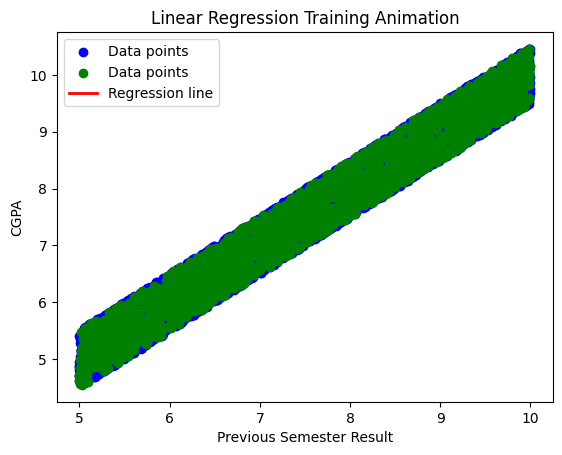

In [23]:
# Setup plot
fig, ax = plt.subplots()
ax.scatter(training_input, training_output, color="blue", label="Data points")
ax.scatter(testing_input, testing_output, color="green", label="Data points")
line, = ax.plot([], [], "r-", linewidth=2, label="Regression line")
ax.legend()
ax.set_xlabel("Previous Semester Result")
ax.set_ylabel("CGPA")
ax.set_title("Linear Regression Training Animation")

# Animation function
def update(i):
    # Use training_input for the regression line in the animation
    y_pred_line = theta0_history[i] + theta1_history[i] * training_input
    # print(y_pred_line)
    line.set_data(training_input, y_pred_line)  # Set data for the line
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(theta0_history), interval=1000, blit=True)

plt.show()

In [ ]:
predicted_data = testing_input * m + b

mse = np.mean((testing_output - predicted_data) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(testing_output - predicted_data))

print(mse)
print(rmse)
print(mae)